In [131]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OrdinalEncoder,LabelEncoder
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [132]:
Temperature = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")
Temperature.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [133]:
Temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [134]:
Temperature.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [135]:
Temperature.Next_Tmin.nunique()

157

In [136]:
Temperature.isna().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

converting and filling the null values od the date and to datetime format and setting as index accordinly

In [137]:
Temperature['Date']=Temperature['Date'].fillna(Temperature['Date'].mode()[0])
print(Temperature['Date'].isnull().sum())
Temperature['Date'] = pd.to_datetime(Temperature['Date'])
Temperature.set_index('Date', inplace = True)
Temperature.head()

0


,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
Date,,,,,,,,,,,,,,,,,,,,,
2013-06-30,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
2013-06-30,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2013-06-30,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
2013-06-30,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
2013-06-30,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [138]:
Temperature.nunique().to_frame('no of unique values')

,no of unique values
station,25
Present_Tmax,167
Present_Tmin,155
LDAPS_RHmin,7672
LDAPS_RHmax,7664
LDAPS_Tmax_lapse,7675
LDAPS_Tmin_lapse,7675
LDAPS_WS,7675
LDAPS_LH,7675
LDAPS_CC1,7569


In [139]:
Temperature['lat'].head()

Date
2013-06-30    37.6046
2013-06-30    37.6046
2013-06-30    37.5776
2013-06-30    37.6450
2013-06-30    37.5507
Name: lat, dtype: float64

now filling all the null values in the entire column. using mean method since they are all continious data type

In [140]:
for i in Temperature:
    if Temperature[i].dtypes!='object':
        Temperature[i]=Temperature[i].fillna(Temperature[i].mean())

In [141]:
Temperature.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [142]:
Temperature.drop('Next_Tmin', axis=1).corrwith(Temperature.Next_Tmin)

station             0.128293
Present_Tmax        0.622741
Present_Tmin        0.796670
LDAPS_RHmin         0.095019
LDAPS_RHmax        -0.071997
LDAPS_Tmax_lapse    0.586868
LDAPS_Tmin_lapse    0.880176
LDAPS_WS           -0.096576
LDAPS_LH           -0.055440
LDAPS_CC1          -0.011028
LDAPS_CC2           0.031250
LDAPS_CC3          -0.054726
LDAPS_CC4          -0.085093
LDAPS_PPT1          0.021323
LDAPS_PPT2         -0.008058
LDAPS_PPT3         -0.062622
LDAPS_PPT4         -0.103682
lat                -0.083533
lon                -0.046603
DEM                -0.246906
Slope              -0.146882
Solar radiation     0.120212
Next_Tmax           0.621427
dtype: float64

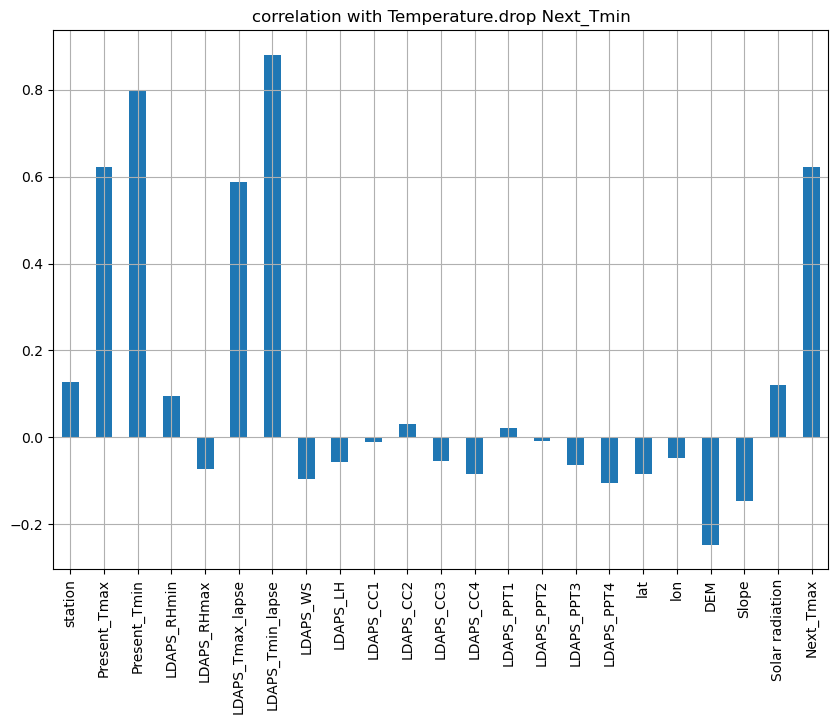

In [143]:
Temperature.drop('Next_Tmin', axis=1).corrwith(Temperature.Next_Tmin).plot(kind='bar',grid =True, figsize = (10,7),
                                                                        title = 'correlation with Temperature.drop Next_Tmin')


plt.show()


In [144]:
from sklearn.feature_selection import SelectKBest, f_classif

In [145]:
Features = Temperature.drop(['Next_Tmin'],axis=1)
Label = Temperature['Next_Tmin']

In [147]:
best_features = SelectKBest(score_func = f_classif, k = 20)
fit = best_features.fit(Features,Label)
Temperature_scores = pd.DataFrame(fit.scores_)
Temperature_columns = pd.DataFrame(Features.columns)
features_scores = pd.concat([Temperature_columns, Temperature_scores], axis = 1)
features_scores.columns = ['Features_name', 'Score']
print(features_scores.nlargest(20, 'Score'))

       Features_name       Score
6   LDAPS_Tmin_lapse  176.769009
2       Present_Tmin   88.364060
1       Present_Tmax   33.425321
22         Next_Tmax   33.345217
5   LDAPS_Tmax_lapse   27.540384
21   Solar radiation    5.703104
19               DEM    4.430743
3        LDAPS_RHmin    2.861991
16        LDAPS_PPT4    2.660640
4        LDAPS_RHmax    2.586889
12         LDAPS_CC4    2.559094
15        LDAPS_PPT3    2.490605
7           LDAPS_WS    2.459744
11         LDAPS_CC3    2.338759
0            station    2.132421
20             Slope    1.982900
13        LDAPS_PPT1    1.880390
10         LDAPS_CC2    1.845699
9          LDAPS_CC1    1.651187
8           LDAPS_LH    1.645239


from above my k best = 7, because there is no much difference in the values after the seventh feature.

In [151]:
Temperature_new= Temperature[['LDAPS_Tmin_lapse','Present_Tmin','Present_Tmax','Next_Tmax','LDAPS_Tmax_lapse','Solar radiation','DEM']]
Temperature_new.head()

,LDAPS_Tmin_lapse,Present_Tmin,Present_Tmax,Next_Tmax,LDAPS_Tmax_lapse,Solar radiation,DEM
Date,,,,,,,
2013-06-30,23.006936,21.4,28.7,29.1,28.074101,5992.895996,212.3350
2013-06-30,24.035009,21.6,31.9,30.5,29.850689,5869.312500,44.7624
2013-06-30,24.565633,23.3,31.6,31.1,30.091292,5863.555664,33.3068
2013-06-30,23.326177,23.4,32.0,31.7,29.704629,5856.964844,45.7160
2013-06-30,23.486480,21.9,31.4,31.2,29.113934,5859.552246,35.0380


In [152]:
Temperature_new.describe()

,LDAPS_Tmin_lapse,Present_Tmin,Present_Tmax,Next_Tmax,LDAPS_Tmax_lapse,Solar radiation,DEM
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,23.512589,23.225059,29.768211,30.274887,29.613447,5341.502803,61.867972
std,2.333973,2.403036,2.956557,3.122557,2.932898,429.158867,54.279780
min,14.272646,11.300000,20.000000,17.400000,17.624954,4329.520508,12.370000
25%,22.114651,21.700000,27.800000,28.200000,27.693091,4999.018555,28.700000
50%,23.735942,23.400000,29.900000,30.500000,29.662273,5436.345215,45.716000
75%,25.134000,24.900000,32.000000,32.600000,31.683819,5728.316406,59.832400
max,29.619342,29.900000,37.600000,38.900000,38.542255,5992.895996,212.335000


In [153]:
scaler = StandardScaler()
Temperature_scaler = pd.DataFrame(scaler.fit_transform(Temperature_new))
Temperature_scaler.head(8)

,0,1,2,3,4,5,6
0,-0.216663,-0.759529,-0.361326,-0.376282,-0.524889,1.517935,2.772243
1,0.223848,-0.676296,0.721084,0.072097,0.080895,1.229950,-0.315157
2,0.451210,0.031188,0.619608,0.264260,0.162936,1.216534,-0.526218
3,-0.079874,0.072805,0.754909,0.456422,0.031092,1.201176,-0.297588
4,-0.011187,-0.551446,0.551957,0.296287,-0.170325,1.207205,-0.494322
5,0.132840,0.114422,0.721084,0.392368,-0.134382,1.240362,-0.133199
6,0.311026,0.488972,0.551957,0.200206,-0.361982,1.183159,-0.911963
7,0.131315,0.156038,0.788735,0.264260,-0.259646,1.217552,-0.172266


In [154]:
vif = pd.DataFrame()
vif['vif values']= [variance_inflation_factor(Temperature_scaler.values, i) for i in range(len(Temperature_scaler.columns))]
vif['features'] = Temperature_scaler.columns

In [155]:
vif

,vif values,features
0,3.503850,0
1,2.752264,1
2,2.123858,2
3,3.497209,3
4,3.770696,4
5,1.066260,5
6,1.079153,6


Now the building of the model since my dat is clean and i have choosing the best features

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold,cross_val_score
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor as DT
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [157]:
MaxAccu = 0
MaxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(Temperature_scaler,Label,test_size = .30, random_state = i)
    Lr = LinearRegression()
    Lr.fit(x_train,y_train)
    pred = Lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>MaxAccu:
        MaxAccu = acc
        MaxRS = i
print('maximum r2 score is =',MaxAccu,'\n random state = ',MaxRS)

maximum r2 score is = 0.8499381497132612 
 random state =  84


In [158]:
x_train,x_test,y_train,y_test = train_test_split(Temperature_scaler,Label, test_size = 0.30, random_state = MaxRS)

In [159]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr = rfr.predict(x_test)
pred_train = rfr.predict(x_train)
print ('R2 score:', r2_score(y_test,pred_rfr))
print ('R2 score on training Data:',r2_score(y_train,pred_train))
print ('Mean absolute Error:', mean_absolute_error(y_test,pred_rfr))
print ('Mean squared Error:', mean_squared_error(y_test,pred_rfr))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,pred_rfr)))

R2 score: 0.8908608774843928
R2 score on training Data: 0.9833300060085755
Mean absolute Error: 0.6284574410004257
Mean squared Error: 0.697185246796497
Root mean squared Error: 0.8349761953472069


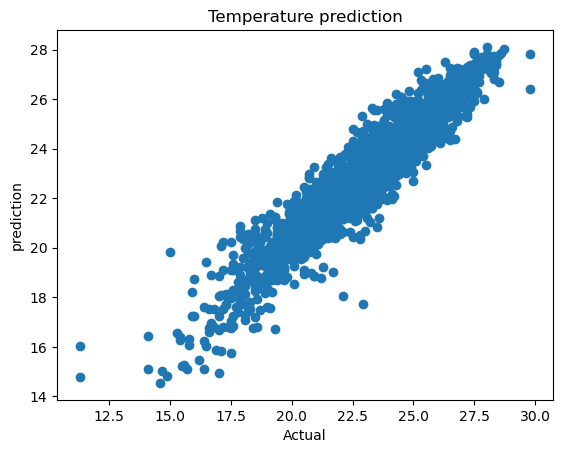

In [160]:
plt.scatter(y_test,pred_rfr)
plt.xlabel('Actual')
plt.ylabel('prediction')
plt.title('Temperature prediction')
plt.show()

In [166]:
Ada = AdaBoostRegressor()
Ada.fit(x_train,y_train)
pred_Ada = Ada.predict(x_test)
pred_train = Ada.predict(x_train)
print ('R2 score:', r2_score(y_test,pred_Ada))
print ('R2 score on training Data:',r2_score(y_train,pred_train))
print ('Mean absolute Error:', mean_absolute_error(y_test,pred_Ada))
print ('Mean squared Error:', mean_squared_error(y_test,pred_Ada))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,pred_Ada)))

R2 score: 0.8077987346237301
R2 score on training Data: 0.8026198678289873
Mean absolute Error: 0.8837180819643394
Mean squared Error: 1.227789664671268
Root mean squared Error: 1.1080567064330544


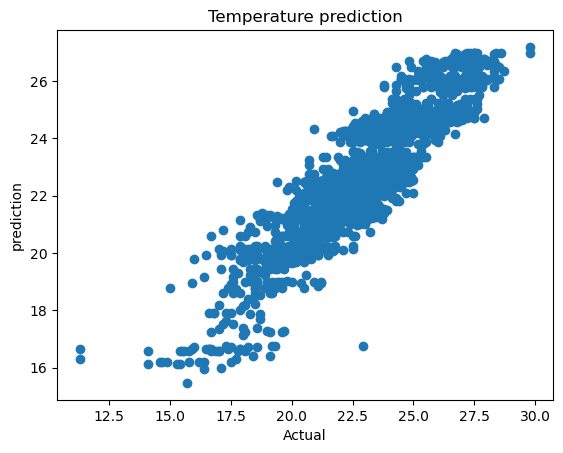

In [167]:
plt.scatter(y_test,pred_Ada)
plt.xlabel('Actual')
plt.ylabel('prediction')
plt.title('Temperature prediction')
plt.show()

In [163]:
lasso = Lasso()
lasso.fit(x_train,y_train)
pred_lasso = lasso.predict(x_test)
pred_train = lasso.predict(x_train)
print ('R2 score:', r2_score(y_test,pred_lasso))
print ('R2 score on training Data:',r2_score(y_train,pred_train))
print ('Mean absolute Error:', mean_absolute_error(y_test,pred_lasso))
print ('Mean squared Error:', mean_squared_error(y_test,pred_lasso))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2 score: 0.6217715829456469
R2 score on training Data: 0.6166474843475938
Mean absolute Error: 1.2156179514212906
Mean squared Error: 2.4161388346491277
Root mean squared Error: 1.5543933976471747


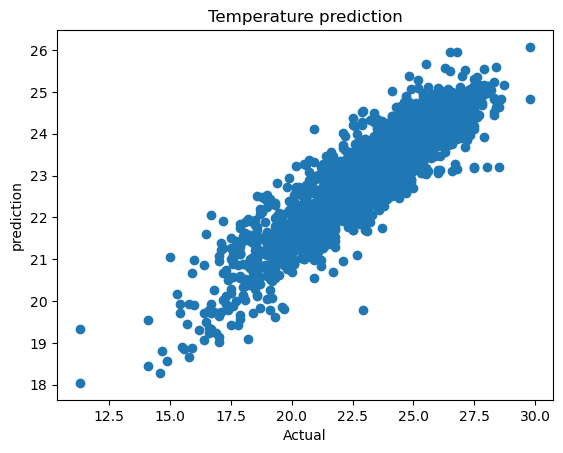

In [164]:
plt.scatter(y_test,pred_lasso)
plt.xlabel('Actual')
plt.ylabel('prediction')
plt.title('Temperature prediction')
plt.show()

In [165]:
from sklearn.model_selection import cross_val_score

In [168]:
score1 = cross_val_score(Lr,Temperature_scaler,Label,cv=5,scoring='r2')
print(score1)
print(score1.mean())
print('difference =',(r2_score(y_test,pred)-score1.mean()))

[0.70730195 0.66581688 0.80859449 0.88548058 0.88015793]
0.7894703667467673
difference = -1.6293186100278076


In [169]:
score3 = cross_val_score(Ada,Temperature_scaler,Label,cv=5,scoring='r2')
print(score3)
print(score3.mean())
print('difference =',(r2_score(y_test,pred_Ada)-score3.mean()))

[0.62888157 0.60044221 0.74845303 0.833799   0.84309799]
0.7309347604437233
difference = 0.07686397418000679


In [170]:
score2 = cross_val_score(lasso,Temperature_scaler,Label,cv=5,scoring='r2')
print(score2)
print(score2.mean())
print('difference =',(r2_score(y_test,pred_lasso)-score2.mean()))

[0.55200986 0.4384329  0.59861448 0.52635107 0.66071238]
0.5552241390006536
difference = 0.06654744394499335


In [171]:
score1 = cross_val_score(rfr,Temperature_scaler,Label,cv=5,scoring='r2')
print(score1)
print(score1.mean())
print('difference =',(r2_score(y_test,pred_rfr)-score1.mean()))

[0.64077486 0.65147599 0.79071358 0.86080004 0.8700396 ]
0.7627608141412824
difference = 0.12804700908253852


Linear regression is my best model as the difference between accuracy score and cross validation score is least

Hyper parameter tunning

In [208]:
from sklearn.model_selection import GridSearchCV
params_grid = {
             'fit_intercept': [ True, False],
             'copy_X':[True, False],
             }

In [209]:
grid_search =GridSearchCV(estimator=Lr, param_grid = params_grid, cv = 5)

In [210]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False]})

In [211]:
my_best_parameter = grid_search.best_params_
print(my_best_parameter)

{'copy_X': True, 'fit_intercept': True}


In [213]:
Lr_final = LinearRegression(copy_X= True, fit_intercept= True)

In [214]:
Lr_final

LinearRegression()

In [215]:
Lr_final.fit(x_train,y_train)
my_prediction = Lr_final.predict(x_test)
print ('R2 score:', r2_score(y_test,my_prediction))
print ('Mean absolute Error:', mean_absolute_error(y_test,my_prediction))
print ('Mean squared Error:', mean_squared_error(y_test,my_prediction))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,my_prediction)))

R2 score: 0.8499381497132612
Mean absolute Error: 0.7644038548494301
Mean squared Error: 0.9586013311765258
Root mean squared Error: 0.9790818817527601


In [216]:
import joblib
import pickle
filename = 'max_temp.pkl'
pickle.dump(Lr_final,open(filename,'wb'))

In [217]:
import pickle
loaded_Lr_final=pickle.load(open(filename,'rb'))
result = loaded_Lr_final.score(x_test,y_test)
print(result*100)

84.99381497132612
